In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#seeking to use 4 algorithms

In [2]:
df=pd.read_csv("dibates.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
(df== 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

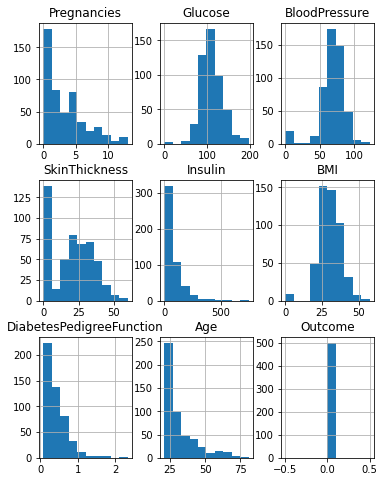

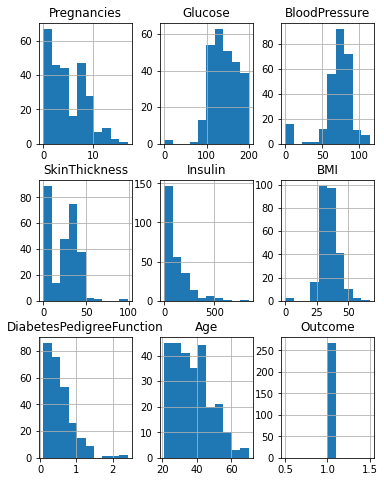

In [5]:
df.groupby("Outcome").hist(figsize=(6,8))

**here we could clearly see the dependency of age on the factor 1 in the outcome column suggesting it being highly related to the outcome as well as glucose levels**


In [6]:
df_refined=df[(df.Glucose!=0) & (df.BloodPressure!=0) & (df.BMI!=0)]
#data cleaning
df_refined.shape

(724, 9)

In [7]:
lr=LogisticRegression(random_state=0)
dct=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)
sv=SVC(random_state=0,kernel='rbf')
#TRIED CHANGING KERNEL VALUES BUT GOT EVEN LOWER ACCURACY
x=df_refined.iloc[:,0:8].values
y=df_refined.iloc[:,8].values
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.33)
sc=StandardScaler()

In [9]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [10]:
lr.fit(x_train,y_train)
dct.fit(x_train,y_train)
rfc.fit(x_train,y_train)
sv.fit(x_train,y_train)

SVC(random_state=0)

In [11]:
accuracy=[]
types=["LogisticRegression","DecisionTree","RandomForest","SVM"]
y_pred_logistic=lr.predict(x_test)
accuracy.append(accuracy_score(y_pred_logistic,y_test))

In [12]:
y_pred_decision_tree_classifier=dct.predict(x_test)
accuracy.append(accuracy_score(y_pred_decision_tree_classifier,y_test))

In [13]:
y_pred_random_forest=rfc.predict(x_test)
accuracy.append(accuracy_score(y_pred_random_forest,y_test))

In [14]:
y_pred_svm=sv.predict(x_test)
accuracy.append(accuracy_score(y_pred_svm,y_test))

[0.7824267782426778, 0.6903765690376569, 0.7573221757322176, 0.7656903765690377]
['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM']


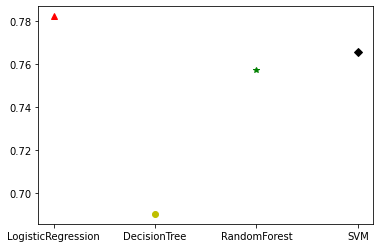

In [15]:
print(accuracy)
print(types)
i=0
colours=["r^","yo","g*","kD"]
for i in range(4) :
   plt.plot(types[i],accuracy[i],colours[i])

I HAVE USED 4 CLASSIFICATION ALGORITHMS TO POINT OUT THE ACCURACIES FOR THE TOP 2 FOR MY PROJECT AND THEN COMPARE THEM, WHICH ARE FOUND TO BE **LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINE CLASSIFICATION ALGORITHMS WITH RESPECTIVELY 78.24 % and 76.57 % APPROX ACCURACIES IN PREDICTING THE TEST SET VALUES**

***I COULD CONCLUDE THAT I FOUND AN ACCURACY OF 78.24 % USING LOGISTIC REGRESSION ALGORITHM HENCE WHEN COMPARED TO ALL OTHER ALGORITHMS HERE IT GIVES US A MUCH MORE ACCURATE RESULT.***

In [ ]:
new_data = []
# iterating till the range
for i in range(0,8):
    ele = float(input())
    new_data.append(ele) # adding the element
      
print(new_data)

#5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0

In [ ]:
import numpy as np
# changing the input_data to numpy array
new_data_as_numpy_array = np.asarray(new_data)

# reshape the array as we are predicting for one instance
new_data_reshaped = new_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(new_data_reshaped)
print(std_data)

prediction = lr.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

if (prediction[0] == 0):
  new_data.append(0)
else:
  new_data.append(1)

if (prediction[0] == 0):
  new_data.append(0)
else:
  new_data.append(1)

In [ ]:
from csv import writer
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)


append_list_as_row("dibates.csv", new_data)